In [1]:
import pandas as pd

from model import DataLoader,FeatureEngineering,ModelTrainer,ModelEvaluator

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

import pickle

new_data = pd.DataFrame({
    'NAME_CONTRACT_TYPE': ['Cash loans'],
    'CODE_GENDER': ['F'],
    'FLAG_OWN_CAR': ['Y'],
    'FLAG_OWN_REALTY': ['Y'],
    'NAME_EDUCATION_TYPE': ['Higher education'],
    'OCCUPATION_TYPE': ['Accountants'],
    'ORGANIZATION_TYPE': ['Business Entity Type 3'],
    'EXT_SOURCE_1': [0.774761],
    'EXT_SOURCE_2': [0.724],
    'EXT_SOURCE_3': [0.49206]
})


def plot_roc_curve(true_labels, predicted_labels):
    fpr, tpr, _ = roc_curve(true_labels, predicted_labels)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


In [2]:
columns_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                    'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE',
                    'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']

data_loader = DataLoader("data/input/",columns = columns_features)
data_train, data_test, target = data_loader.get_data()

feature_engineering = FeatureEngineering(data_train, data_test, target)
features, target = feature_engineering.engineer_features()


 --------------- Regressão Logistica --------------- 

Accuracy: 0.6562104797700641
ROC AUC: 0.6562106808427076
Probabilities: [0.16187167]


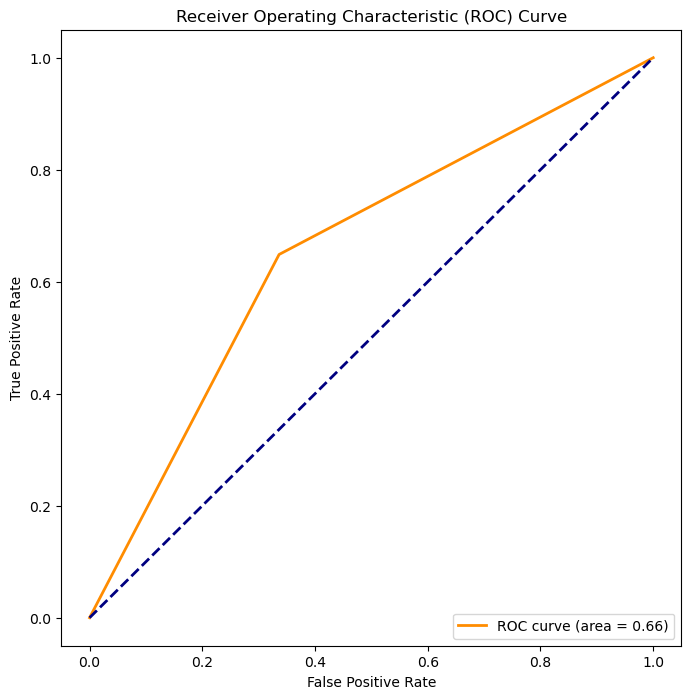


 -------------------------------------------------- 



In [3]:
#Logistic_regression_model
print('\n --------------- Regressão Logistica --------------- \n')
logistic_regression_model = LogisticRegression() # Regressão Logistica
model_trainer = ModelTrainer(logistic_regression_model, features, target)
true_labels, predicted_labels = model_trainer.train_model()
model_evaluator = ModelEvaluator(true_labels, predicted_labels)
accuracy, roc_auc = model_evaluator.evaluate_model()
probabilities = model_trainer.predict_probability(feature_engineering.transform_new_data(new_data))
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Probabilities: {probabilities}")
plot_roc_curve(true_labels, predicted_labels)
print('\n -------------------------------------------------- \n')



 --------------- Random Forest --------------- 

Accuracy: 0.9798894539022772
ROC AUC: 0.9798889250265953
Probabilities: [0.01]


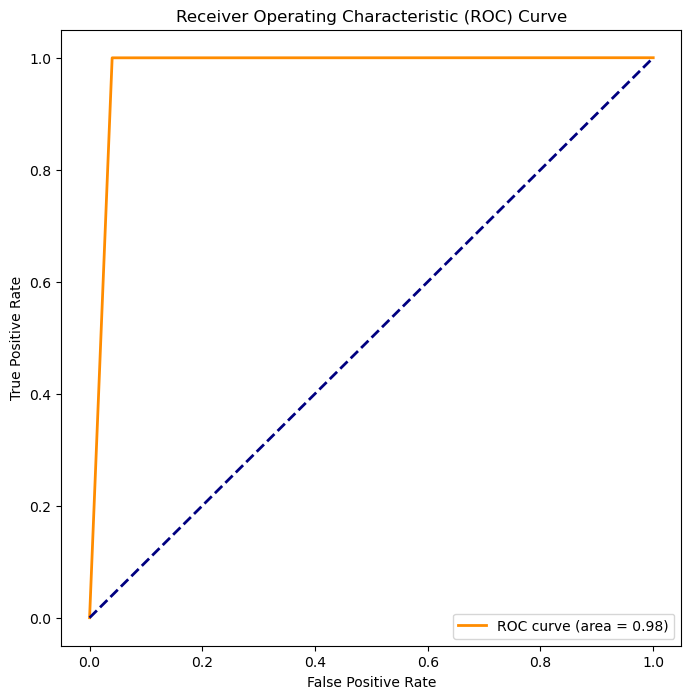


 -------------------------------------------------- 



In [4]:
#Random Forest
print('\n --------------- Random Forest --------------- \n')
random_forest_model = RandomForestClassifier() # Random Forest
model_trainer = ModelTrainer(random_forest_model, features, target)
true_labels, predicted_labels = model_trainer.train_model()
model_evaluator = ModelEvaluator(true_labels, predicted_labels)
accuracy, roc_auc = model_evaluator.evaluate_model()
probabilities = model_trainer.predict_probability(feature_engineering.transform_new_data(new_data))
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Probabilities: {probabilities}")
plot_roc_curve(true_labels, predicted_labels)
print('\n -------------------------------------------------- \n')

# Salve a função predict_probability em um arquivo usando pickle
with open('predict_probability.pkl', 'wb') as file:
    pickle.dump(model_trainer.predict_probability, file)



 ---------------- Gradient Boosting Classifier ---------------- 

Accuracy: 0.6764713685606898
ROC AUC: 0.6764712601674027
Probabilities: [0.12598096]


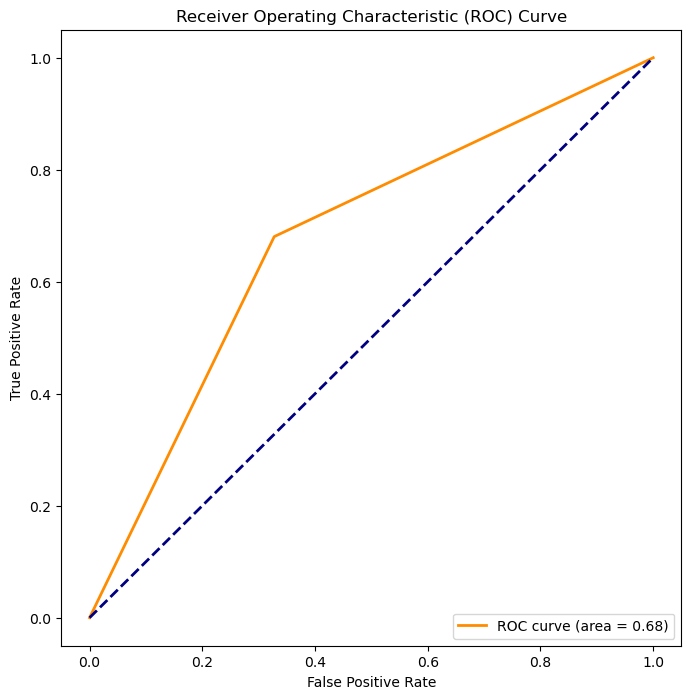


 ------------------------------------------------------------- 



In [5]:
# Gradient Boosting Classifier
print('\n ---------------- Gradient Boosting Classifier ---------------- \n')
gradient_boosting_model = GradientBoostingClassifier()  # Gradient Boosting Classifier
model_trainer = ModelTrainer(gradient_boosting_model, features, target)
true_labels, predicted_labels = model_trainer.train_model()
model_evaluator = ModelEvaluator(true_labels, predicted_labels)
accuracy, roc_auc = model_evaluator.evaluate_model()
probabilities = model_trainer.predict_probability(feature_engineering.transform_new_data(new_data))
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Probabilities: {probabilities}")
plot_roc_curve(true_labels, predicted_labels)
print('\n ------------------------------------------------------------- \n')
